# Simple demo for using asymmetric coupling of networks Python code

In [1]:
%pylab inline 
from numpy import *

import sys
sys.path.append('../utils')
from network_properties import *
from Laplacians import *
from plot import *

Populating the interactive namespace from numpy and matplotlib


## 1. get the Laplacians of a simple multiplex network with n=6 nodes and t=2 layers

In [2]:
G = get_network_properties('SimpleNetwork')
G

#G[0] number of nodes
#G[1] number of layers
#G[2] = G[0]*G[1]
#G[3] = [layer1,layer2], and both are networkx graphs
#G[4] = list of interlayer edges

#print('There are n =',G[0], 'nodes and t =',G[1], 'layers in this network.')

[6,
 2,
 12,
 array([[1, 2]])]

/Users/zhaosong/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


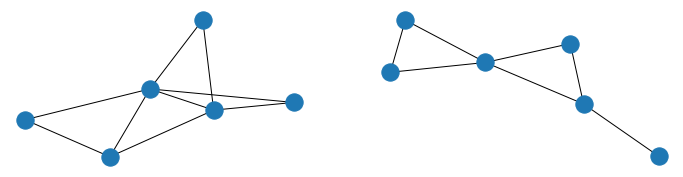

In [3]:
# draw the 2 layers
layer1_graph = G[3][0]
layer2_graph = G[3][1]
f1,ax = plt.subplots(1,2,figsize=(12,3))
nx.draw(layer1_graph,ax=ax[0]);
nx.draw(layer2_graph,ax=ax[1])

In [4]:
delta = .8 # asymmetry between layers. it affects interlayer laplacian
Ls = get_Laplacian(G,delta)

Ls

# Ls['LTs'] intralayer Laplacians
# Ls['ATs'] intralayer adjacency matrices
# Ls['LL'] intralayer supraLaplacian
# Ls['II'] interlayer Laplacian
# Ls['LI'] interlayer supraLaplacian


{'LTs': array([[[ 3., -1., -1., -1.,  0.,  0.],
         [-1.,  4.,  0., -1., -1., -1.],
         [-1.,  0.,  2., -1.,  0.,  0.],
         [-1., -1., -1.,  5., -1., -1.],
         [ 0., -1.,  0., -1.,  2.,  0.],
         [ 0., -1.,  0., -1.,  0.,  2.]],
 
        [[ 3., -1., -1., -1.,  0.,  0.],
         [-1.,  1.,  0.,  0.,  0.,  0.],
         [-1.,  0.,  4., -1., -1., -1.],
         [-1.,  0., -1.,  2.,  0.,  0.],
         [ 0.,  0., -1.,  0.,  2., -1.],
         [ 0.,  0., -1.,  0., -1.,  2.]]]),
 'ATs': array([[[0., 1., 1., 1., 0., 0.],
         [1., 0., 0., 1., 1., 1.],
         [1., 0., 0., 1., 0., 0.],
         [1., 1., 1., 0., 1., 1.],
         [0., 1., 0., 1., 0., 0.],
         [0., 1., 0., 1., 0., 0.]],
 
        [[0., 1., 1., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 1., 1., 1.],
         [1., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 1.],
         [0., 0., 1., 0., 1., 0.]]]),
 'LL': array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0

In [5]:
omega = .5 # coupling strength
supraL = get_supra_Laplacian(G,omega,delta)
supraL

array([[ 3.1, -1. , -1. , -1. ,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [-1. ,  4.1,  0. , -1. , -1. , -1. ,  0. , -0.1,  0. ,  0. ,  0. ,
         0. ],
       [-1. ,  0. ,  2.1, -1. ,  0. ,  0. ,  0. ,  0. , -0.1,  0. ,  0. ,
         0. ],
       [-1. , -1. , -1. ,  5.1, -1. , -1. ,  0. ,  0. ,  0. , -0.1,  0. ,
         0. ],
       [ 0. , -1. ,  0. , -1. ,  2.1,  0. ,  0. ,  0. ,  0. ,  0. , -0.1,
         0. ],
       [ 0. , -1. ,  0. , -1. ,  0. ,  2.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        -0.1],
       [-0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  3.9, -1. , -1. , -1. ,  0. ,
         0. ],
       [ 0. , -0.9,  0. ,  0. ,  0. ,  0. , -1. ,  1.9,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. , -0.9,  0. ,  0. ,  0. , -1. ,  0. ,  4.9, -1. , -1. ,
        -1. ],
       [ 0. ,  0. ,  0. , -0.9,  0. ,  0. , -1. ,  0. , -1. ,  2.9,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.9,  0. ,  0. ,  0. , -1. ,  0. ,  2.9,
        -1. ],
       [ 0. ,  0. ,  

## 2. time series

In [6]:
dt = .002
tt = 10000
ts = arange(tt,dtype=float)*dt
x0 = np.linspace(-1,1,G[2])
x = simulate_collective_dynamics(supraL,x0,dt,tt)
shape(x0)

(12,)

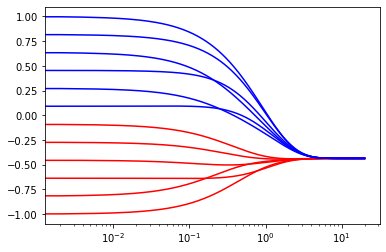

In [7]:
plt.semilogx(ts,x[:,:G[0]],'r');
plt.semilogx(ts,x[:,G[0]:],'b');

Text(0.5, 1.0, 'observed convergence rates')

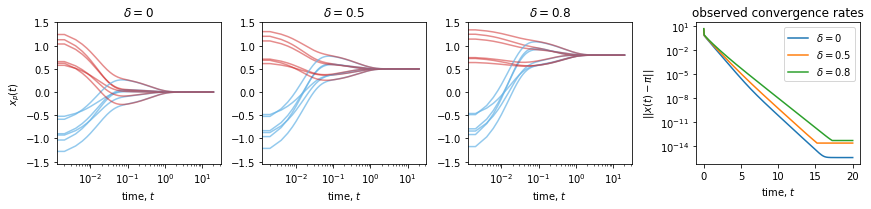

In [8]:
deltas = [0,.5,0.8] 
omegas = [30]*len(deltas)

fig1,ax = subplots(1,4,figsize=(12,2.8),constrained_layout=True)
errors,x,x_final,x0,lam,uu,idd,supraL = plot_timeseries(ax,G,deltas,omegas,tt,dt)
for i in range(3):
    ax[i].set_title('$\delta = '+str(deltas[i])+'$')
ax[-1].set_title('observed convergence rates')

## 3. study $\text{Re}(\lambda_2)$ vs $\delta$ 

* cuve of lambda_2 vs delta for omega = 20
* curve of predicted lambda_2 vs delta for omega \to infinity

$$
    \delta
$$

In [9]:
#G = get_network_properties('SimpleNetwork')
omegas = logspace(-.5,1.5,9) # a bunch of coupling strengths
omega = array([omegas[-1]])
deltas = linspace(-1,1,51) # a bunch of asymmetry parameters

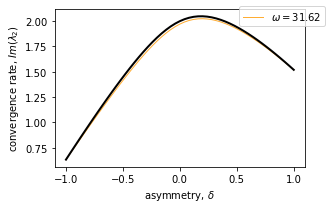

In [10]:
Levals = get_evals_across_omegas_deltas(G,omega,deltas) # eigenvalues of supra-Laplacian
fig,ax = subplots(1,1,figsize=(4.5,2.8),constrained_layout=True)
plot_lambda2_vs_delta_omegas(Levals.real,omega,deltas,ax)
plot_lambda2_vs_delta_thm(G,deltas,ax)
ax.set_xlabel('asymmetry, $\delta$')
ax.set_ylabel('convergence rate, $Im(\lambda_2)$');
ax.legend(['$\omega = '+str(w)[:5]+'$' for w in omega],bbox_to_anchor=(1.1, 1.05),fontsize=10)

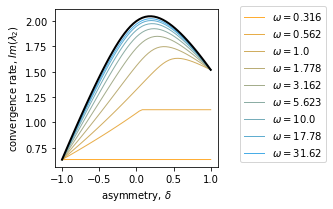

In [11]:
Levals = get_evals_across_omegas_deltas(G,omegas,deltas) # eigenvalues of supra-Laplacian
fig,ax = subplots(1,1,figsize=(4.5,2.8),constrained_layout=True)
plot_lambda2_vs_delta_omegas(Levals.real,omegas,deltas,ax)
plot_lambda2_vs_delta_thm(G,deltas,ax)
ax.set_xlabel('asymmetry, $\delta$')
ax.set_ylabel('convergence rate, $Im(\lambda_2)$');
ax.legend(['$\omega = '+str(w)[:5]+'$' for w in omegas],bbox_to_anchor=(1.1, 1.05),fontsize=10)

## 4. study $\text{Re}(\lambda_2)$ vs $\omega$

In [40]:
#G = get_network_properties('SimpleNetwork')
omegas =  logspace(-2,2,61) # a bunch of coupling strengths
deltas = linspace(-1,1,9) # a bunch of asymmetry parameters
delta = array([deltas[-3]])

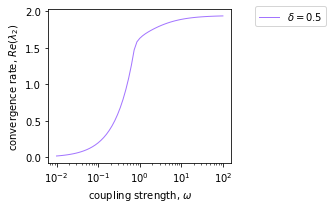

In [41]:
fig,ax = subplots(1,1,figsize=(4.5,2.8),constrained_layout=True)
plot_lambda2_vs_omega_deltas(G,omegas,delta,ax)
ax.set_xlabel('coupling strength, $\omega$')
ax.set_ylabel('convergence rate, $Re(\lambda_2)$')
ax.legend(['$\delta = '+str(d)+'$' for d in delta],bbox_to_anchor=(1.1, 1.05),fontsize=10)

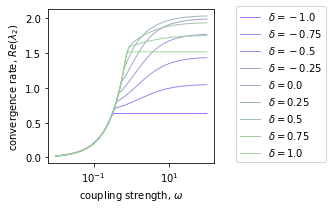

In [42]:
fig,ax = subplots(1,1,figsize=(4.5,2.8),constrained_layout=True)
plot_lambda2_vs_omega_deltas(G,omegas,deltas,ax)
ax.set_xlabel('coupling strength, $\omega$')
ax.set_ylabel('convergence rate, $Re(\lambda_2)$')
ax.legend(['$\delta = '+str(d)+'$' for d in deltas],bbox_to_anchor=(1.1, 1.05),fontsize=10)

## 5. study predicted $\text{Re}(\lambda_2)$ vs $\delta$ 

In [44]:
network_name = 'SimpleNetwork'
deltas = linspace(-1,1,50)#50
chis = linspace(0.,1,31)#17
omegas = logspace(1,3,9)#9
plot_chis = [i*3 for i in range(11)]
plot_chi = [plot_chis[4]]

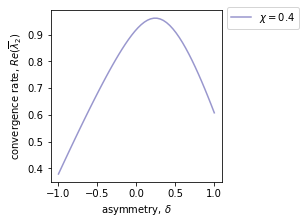

In [45]:
fig,ax = subplots(1,1,figsize=(8,3),constrained_layout=True)
plot_lambda2_vs_delta_chis(network_name,deltas,chis,plot_chi,ax)
ax.set_ylabel('convergence rate, $Re(\overline{\lambda}_2)$')
ax.legend(['$\chi = ' + str(chis[s])[:4] + '$' for s in plot_chi],bbox_to_anchor=(1, 1.05))

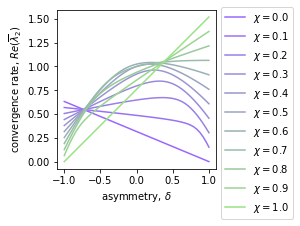

In [7]:
fig,ax = subplots(1,1,figsize=(8,3),constrained_layout=True)
plot_lambda2_vs_delta_chis(network_name,deltas,chis,plot_chis,ax)
ax.set_ylabel('convergence rate, $Re(\overline{\lambda}_2)$')
ax.legend(['$\chi = ' + str(chis[s])[:4] + '$' for s in plot_chis],bbox_to_anchor=(1, 1.05))

## 6. study predicted $\text{Re}(\frac{d\lambda_2}{d\delta})$ vs $\delta$ 

In [ ]:
# network_name = 'SimpleNetwork'
deltas = linspace(-1,1,50)#50
chis = linspace(0.,1,31)#17
omegas = logspace(1,3,9)#9

(0.13333333333333333, 0.7)


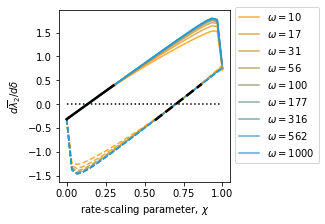

In [46]:
fig,ax = subplots(1,1,figsize=(8,3),constrained_layout=True)
chi_star = plot_dlambda2_ddelta(network_name,omegas,deltas,chis,ax)
ax.set_ylabel('$d\overline{\lambda}_2/d \delta$')
ax.legend(['$\omega = '+str(int(w))+'$' for w in omegas],bbox_to_anchor=(1, 1.05))

print(chi_star)

## 7. study the optimization of Re($\lambda_2$) for the ($\delta, \chi$) parameter space

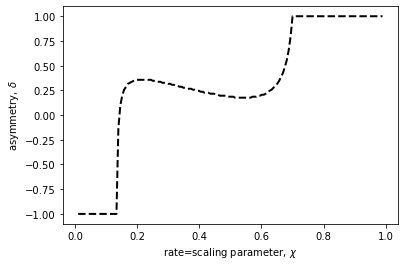

In [47]:
network_name = 'SimpleNetwork'
omegas = logspace(1,3,9) # a bunch of coupling strengths
deltas = linspace(-1,1,200) # a bunch of asymmetry parameter
chis = linspace(0.01,.99,160) # a bunch of rate-scaling parameter

# find the optimal delta for given omega and chi
optima_delta = get_optima(network_name,omegas,deltas,chis)
plt.plot(chis,optima_delta,'--k',linewidth=2)
plt.ylabel('asymmetry, $\delta$')
plt.xlabel('rate=scaling parameter, $\chi$');
plt.title('optimal delta vs chi')

Text(0, 0.5, 'asymmetry, $\\delta$')

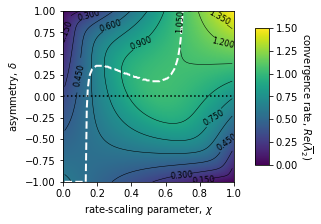

In [41]:
#network_name = 'SimpleNetwork'
omegas = logspace(1,3,9) # a bunch of coupling strengths
deltas = linspace(-1,1,200) # a bunch of asymmetry parameter
chis = linspace(0.01,.99,160) # a bunch of rate-scaling parameter

optima_delta = get_optima(network_name,omegas,deltas,chis)

fig,ax = subplots(1,1,figsize=(6,3),constrained_layout=True)
im = plot_contour(network_name,deltas,chis,ax)
ax.plot(chis,optima_delta,'--w',linewidth=2)
ax.plot([0,1],[0,0],':k')

cbar = fig.colorbar(im, ax=ax, shrink=.8,location='right')
cbar.set_label('convergence rate, $Re(\overline{{\lambda}}_2)$', rotation=270,labelpad=16)
ax.set_ylabel('asymmetry, $\delta$');